<a href="https://colab.research.google.com/github/entc-17-fyp-20/ResultsComparison/blob/main/CNN(research_paper_2017)_model_for_short_term_power_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataframe** 

In [5]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset
url12 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB_dataset_full_august_to_december.csv' #merged CEB dataset
url13 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Belgium_2017_15_min.csv' #Belgium-2017 dataset

**Train an validation data set**

In [16]:
df = pd.read_csv(url13)
df=pd.DataFrame(df)
df_temp=df.copy()
df_temp.count

<bound method DataFrame.count of                         Datetime Resolution code Offshore/onshore    Region  \
0      2017-12-31 23:45:00+01:00           PT15M          Onshore  Flanders   
1      2017-12-31 23:30:00+01:00           PT15M          Onshore  Flanders   
2      2017-12-31 23:15:00+01:00           PT15M          Onshore  Flanders   
3      2017-12-31 23:00:00+01:00           PT15M          Onshore  Flanders   
4      2017-12-31 22:45:00+01:00           PT15M          Onshore  Flanders   
...                          ...             ...              ...       ...   
26399  2017-04-01 01:00:00+02:00           PT15M          Onshore  Flanders   
26400  2017-04-01 00:45:00+02:00           PT15M          Onshore  Flanders   
26401  2017-04-01 00:30:00+02:00           PT15M          Onshore  Flanders   
26402  2017-04-01 00:15:00+02:00           PT15M          Onshore  Flanders   
26403  2017-04-01 00:00:00+02:00           PT15M          Onshore  Flanders   

      Grid connect

In [17]:
df=df_temp[:26000] #8/1/2021 0:00 to 9/30/2021 23:50

In [ ]:
# test_set_1 = df_temp[5000:5500]  #10/1/2021 00:00 to 10/10/2021 23:50
# test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
# test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

# dataset_index=1

# if dataset_index==1:
#   df_test = test_set_1
# elif dataset_index==2:
#   df_test = test_set_2
# elif dataset_index==3:
#   df_test = test_set_3

#df_test

In [18]:
df

,Datetime,Resolution code,Offshore/onshore,Region,Grid connection type,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2017-12-31 23:45:00+01:00,PT15M,Onshore,Flanders,Elia,40.67,45.41,41.45,48.65,46.60,...,49.52,46.24,40.95,49.79,30.49,13.63,46.53,53.86,0.76,0
1,2017-12-31 23:30:00+01:00,PT15M,Onshore,Flanders,Elia,42.19,44.93,40.51,48.53,46.17,...,49.55,45.80,40.02,49.84,30.54,13.74,46.54,53.86,0.78,0
2,2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,...,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0
3,2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,...,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
4,2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,...,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,2017-04-05 06:00:00+02:00,PT15M,Onshore,Flanders,Elia,13.45,10.73,3.77,16.85,9.49,...,16.54,9.80,3.05,16.80,9.85,0.53,19.24,63.01,0.21,0
25996,2017-04-05 05:45:00+02:00,PT15M,Onshore,Flanders,Elia,11.01,9.21,3.00,15.42,9.32,...,16.30,9.55,2.88,16.49,9.81,0.56,19.14,63.01,0.17,0
25997,2017-04-05 05:30:00+02:00,PT15M,Onshore,Flanders,Elia,9.96,8.84,2.87,14.82,9.04,...,15.95,9.08,2.55,15.91,9.81,0.59,19.11,63.01,0.16,0
25998,2017-04-05 05:15:00+02:00,PT15M,Onshore,Flanders,Elia,11.26,8.48,2.74,14.22,8.75,...,15.59,8.60,2.21,15.33,9.80,0.63,19.07,63.01,0.18,0


**Rename column names**

In [19]:
col_1=(df.columns)[0]
col_2=(df.columns)[5]
feature = 'Active Power'
feature_1 = 'Forecasted Power'
df.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)
#df


In [20]:
df

,Date & Time,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2017-12-31 23:45:00+01:00,PT15M,Onshore,Flanders,Elia,40.67,45.41,41.45,48.65,46.60,...,49.52,46.24,40.95,49.79,30.49,13.63,46.53,53.86,0.76,0
1,2017-12-31 23:30:00+01:00,PT15M,Onshore,Flanders,Elia,42.19,44.93,40.51,48.53,46.17,...,49.55,45.80,40.02,49.84,30.54,13.74,46.54,53.86,0.78,0
2,2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,...,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0
3,2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,...,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
4,2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,...,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,2017-04-05 06:00:00+02:00,PT15M,Onshore,Flanders,Elia,13.45,10.73,3.77,16.85,9.49,...,16.54,9.80,3.05,16.80,9.85,0.53,19.24,63.01,0.21,0
25996,2017-04-05 05:45:00+02:00,PT15M,Onshore,Flanders,Elia,11.01,9.21,3.00,15.42,9.32,...,16.30,9.55,2.88,16.49,9.81,0.56,19.14,63.01,0.17,0
25997,2017-04-05 05:30:00+02:00,PT15M,Onshore,Flanders,Elia,9.96,8.84,2.87,14.82,9.04,...,15.95,9.08,2.55,15.91,9.81,0.59,19.11,63.01,0.16,0
25998,2017-04-05 05:15:00+02:00,PT15M,Onshore,Flanders,Elia,11.26,8.48,2.74,14.22,8.75,...,15.59,8.60,2.21,15.33,9.80,0.63,19.07,63.01,0.18,0


In [ ]:
#df_temp.loc[13047]

**Set Data & Time as index**

In [21]:
df=df.set_index('Date & Time')
df=df[::-1]
df

,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
Date & Time,,,,,,,,,,,,,,,,,,,,
2017-04-05 05:00:00+02:00,PT15M,Onshore,Flanders,Elia,9.88,8.11,2.61,13.62,8.47,2.02,15.23,8.13,1.88,14.74,9.80,0.67,19.03,63.01,0.16,0
2017-04-05 05:15:00+02:00,PT15M,Onshore,Flanders,Elia,11.26,8.48,2.74,14.22,8.75,2.21,15.59,8.60,2.21,15.33,9.80,0.63,19.07,63.01,0.18,0
2017-04-05 05:30:00+02:00,PT15M,Onshore,Flanders,Elia,9.96,8.84,2.87,14.82,9.04,2.41,15.95,9.08,2.55,15.91,9.81,0.59,19.11,63.01,0.16,0
2017-04-05 05:45:00+02:00,PT15M,Onshore,Flanders,Elia,11.01,9.21,3.00,15.42,9.32,2.60,16.30,9.55,2.88,16.49,9.81,0.56,19.14,63.01,0.17,0
2017-04-05 06:00:00+02:00,PT15M,Onshore,Flanders,Elia,13.45,10.73,3.77,16.85,9.49,2.69,16.54,9.80,3.05,16.80,9.85,0.53,19.24,63.01,0.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,37.26,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,38.22,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,39.15,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0


**Divide train and validation sets**

In [22]:
L=len(df)
valid_start=int(8*L/10)

train,valid=df[:valid_start],df[valid_start:]

#print(train.shape)
#print(valid.shape)
#print(test.shape)

#print(train.describe())
#print(valid.describe())
#print(test.describe())

# **Data preparation**

In [23]:
T = 400
HORIZON = 1

In [24]:
scaler = MinMaxScaler()
train=pd.DataFrame(train[feature])
train[feature] = scaler.fit_transform(train)

train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted[feature].shift(-1)
#train_shifted.head(10)

**Creating input data to model (Getting T lagged vaules)**

In [25]:
for t in range(1, T+1):
    train_shifted['active_power_t-'+str(T-t)] = train_shifted[feature].shift(T-t)
train_shifted = train_shifted.rename(columns={feature:'Original_active_power'})

# 4.Discard any samples with missing values
train_shifted = train_shifted.dropna(how='any')
#train_shifted.head(10)

**Train input and target arrays**

In [26]:
y_train = np.array(train_shifted["y_t+1"])
X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [27]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], 20,20, 1)

In [28]:
print(y_train.shape)
print(X_train.shape)

(20400,)
(20400, 20, 20, 1)


**Data preparation - Validation data**

In [29]:
valid=pd.DataFrame(valid[feature])
valid_new=df[valid_start-T+1:] #Add T values beforehand to the validation set
valid_new=pd.DataFrame(valid_new[feature])
#valid_new.head(20)

In [30]:
valid_new[feature]=scaler.transform(valid_new)

#Validataion set preparation(Lagged values,create input and target arrays,reshape)]

valid_shifted = valid_new.copy() 
valid_shifted['y_t+1'] = valid_shifted[feature].shift(-1)
valid_shifted.head(10)

for t in range(1, T+1):
    valid_shifted['active_power_t-'+str(T-t)] = valid_shifted[feature].shift(T-t)
vali_shifted = valid_shifted.rename(columns={feature:'Original_active_power'})

valid_shifted = valid_shifted.dropna(how='any')

y_valid = np.array(valid_shifted["y_t+1"])
X_valid=np.array(valid_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], 20,20, 1)

In [31]:
print(y_valid.shape)
print(X_valid.shape)

(5199,)
(5199, 20, 20, 1)


# **Implement the GRU-RNN**

In [32]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(20,20, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(HORIZON, activation='relu'))

In [34]:
UNITS = 5 # number of units in the RNN layer
BATCH_SIZE = 32 # number of samples per mini-batch
EPOCHS = 100 # maximum number of times the training algorithm will cycle through all samples

In [ ]:
# model = Sequential()
# model.add(GRU(UNITS, input_shape=(T, 1)))
# model.add(Dense(HORIZON))

In [35]:
model.compile(optimizer='RMSprop', loss='mse')
#model.summary()

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 6)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 12)          1812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 12)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 1)                 4

In [37]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [38]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/100
638/638 [==============================] - 5s 7ms/step - loss: 0.0187 - val_loss: 0.0157
Epoch 2/100
638/638 [==============================] - 5s 8ms/step - loss: 0.0101 - val_loss: 0.0126
Epoch 3/100
638/638 [==============================] - 4s 7ms/step - loss: 0.0080 - val_loss: 0.0115
Epoch 4/100
638/638 [==============================] - 4s 7ms/step - loss: 0.0070 - val_loss: 0.0166
Epoch 5/100
638/638 [==============================] - 4s 7ms/step - loss: 0.0064 - val_loss: 0.0141
Epoch 6/100
638/638 [==============================] - 4s 7ms/step - loss: 0.0059 - val_loss: 0.0125
Epoch 7/100
638/638 [==============================] - 6s 9ms/step - loss: 0.0055 - val_loss: 0.0111
Epoch 8/100
638/638 [==============================] - 4s 7ms/step - loss: 0.0054 - val_loss: 0.0095
Epoch 9/100
638/638 [==============================] - 4s 7ms/step - loss: 0.0051 - val_loss: 0.0086
Epoch 10/100
638/638 [==============================] - 4s 7ms/step - loss: 0.0049 - val_lo

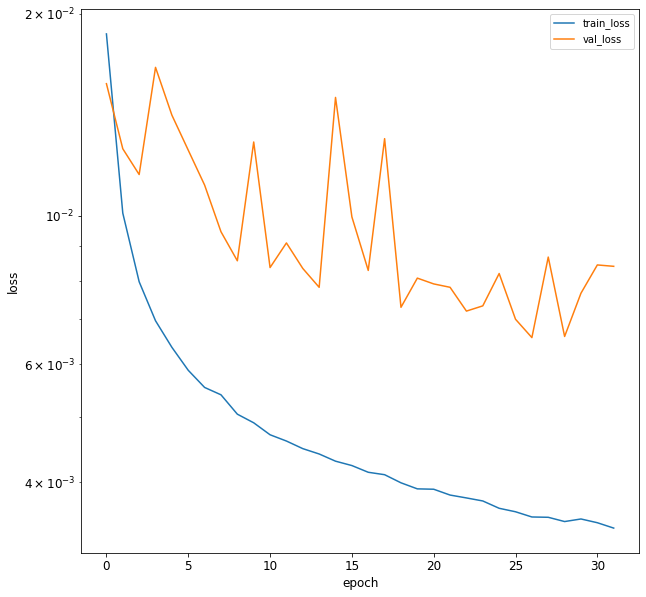

In [40]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# # Save the weights
# path = '/content/drive/MyDrive/Colab Notebooks/Weights/GRU/model.h5'
# model.save(path)

# **Evaluate the model**

**Load test data set**

In [ ]:
#df_test = pd.read_csv(url11)
#df_test=pd.DataFrame(df_test)

In [41]:
#df_test=df_test.drop(0)
#df_test=df_test.head(200)
df_temp.loc[5000]

Datetime                     2017-11-09 21:45:00+01:00
Resolution code                                  PT15M
Offshore/onshore                               Onshore
Region                                        Flanders
Grid connection type                              Elia
Measured & Upscaled                              10.85
Most recent forecast                             11.26
Most recent P10                                   4.60
Most recent P90                                  18.11
Day Ahead 11AM forecast                          13.62
Day Ahead 11AM P10                                6.30
Day Ahead 11AM P90                               20.98
Day-ahead 6PM forecast                           14.28
Day-ahead 6PM P10                                 6.94
Day-ahead 6PM P90                                21.62
Week-ahead forecast                               9.84
Week-ahead P10                                    0.53
Week-ahead P90                                   19.91
Monitored 

In [42]:
test_set_1 = df_temp[26000:]  #10/1/2021 00:00 to 10/10/2021 23:50
test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

dataset_index=1

if dataset_index==1:
  df_test = test_set_1
elif dataset_index==2:
  df_test = test_set_2
elif dataset_index==3:
  df_test = test_set_3



In [43]:
col_1=(df_test.columns)[0]
col_2=(df_test.columns)[5]
#col_3=(df_test.columns)[2]
feature = 'Active Power'
feature_1 = 'Forecasted Power'
df_test.rename(columns={col_1 :'Date & Time' , col_2 : feature },inplace=True)

In [44]:
df_test=df_test.set_index('Date & Time')
#df_test = df_test.apply(pd.to_numeric)
#df_test=df_test.div(1000)
df

,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
Date & Time,,,,,,,,,,,,,,,,,,,,
2017-04-05 05:00:00+02:00,PT15M,Onshore,Flanders,Elia,9.88,8.11,2.61,13.62,8.47,2.02,15.23,8.13,1.88,14.74,9.80,0.67,19.03,63.01,0.16,0
2017-04-05 05:15:00+02:00,PT15M,Onshore,Flanders,Elia,11.26,8.48,2.74,14.22,8.75,2.21,15.59,8.60,2.21,15.33,9.80,0.63,19.07,63.01,0.18,0
2017-04-05 05:30:00+02:00,PT15M,Onshore,Flanders,Elia,9.96,8.84,2.87,14.82,9.04,2.41,15.95,9.08,2.55,15.91,9.81,0.59,19.11,63.01,0.16,0
2017-04-05 05:45:00+02:00,PT15M,Onshore,Flanders,Elia,11.01,9.21,3.00,15.42,9.32,2.60,16.30,9.55,2.88,16.49,9.81,0.56,19.14,63.01,0.17,0
2017-04-05 06:00:00+02:00,PT15M,Onshore,Flanders,Elia,13.45,10.73,3.77,16.85,9.49,2.69,16.54,9.80,3.05,16.80,9.85,0.53,19.24,63.01,0.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,37.26,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,38.22,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,39.15,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0


In [45]:
count = (df_test[feature] == 0).sum()
count

0

**Preprocessing technique**

In [46]:
#df_test[feature]=df_test[feature].replace(0,df_test[feature].median())
df_test[feature]=df_test[feature].replace(to_replace=0, method='ffill').values

In [47]:
scaler = MinMaxScaler()
test=pd.DataFrame(df_test[feature])
test[feature] = scaler.fit_transform(test)


In [48]:

test_shifted = test.copy()
test_shifted['y_t+1'] = test_shifted[feature].shift(-1)

for t in range(1, T+1):
    test_shifted['active_power_t-'+str(T-t)] = test_shifted[feature].shift(T-t)
test_shifted = test_shifted.rename(columns={feature:'Original_active_power'})

forecasted_values=np.array(df_test[feature_1])
test_shifted[feature_1] = forecasted_values
#test_shifted

KeyError: ignored

In [49]:
test_shifted = test_shifted.dropna(how='any')
y_test = np.array(test_shifted['y_t+1'])
X_test=np.array(test_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], 20,20, 1)
#X_test

In [50]:
print(y_test.shape)
print(X_test.shape)

(4,)
(4, 20, 20, 1)


In [51]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
print(predictions)

     0
0 0.17
1 0.17
2 0.19
3 0.14


In [53]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['Date & Time'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='Date & Time', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df['prediction'] =predictions 
#eval_df[feature_1]=np.array(test_shifted[feature_1])
#eval_df

In [54]:
eval_df[['prediction']]=scaler.inverse_transform(np.array(eval_df[['prediction']]))
eval_df[['actual']]=scaler.inverse_transform(np.array(eval_df[['actual']]))
eval_df

,Date & Time,h,prediction,actual
0,2017-04-01 01:00:00+02:00,t+1,3.40,3.91
1,2017-04-01 00:45:00+02:00,t+1,3.43,3.60
2,2017-04-01 00:30:00+02:00,t+1,3.71,2.85
3,2017-04-01 00:15:00+02:00,t+1,3.00,2.34


**MAPE of CNN model**

In [55]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = eval_df['actual']
pred = eval_df['prediction']

mape(actual, pred)

18.93627963468272

**RMSE of CNN model**

In [56]:
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

actual = eval_df['actual']
pred = eval_df['prediction']

rmse(actual, pred)

0.6027050412611391

In [59]:
fig1 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="CNN model:Expected vs predicted power forecasting") 
fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig1.show()

In [ ]:
fig2 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="GRU model:Expected vs predicted power") 
fig2.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig2.show()

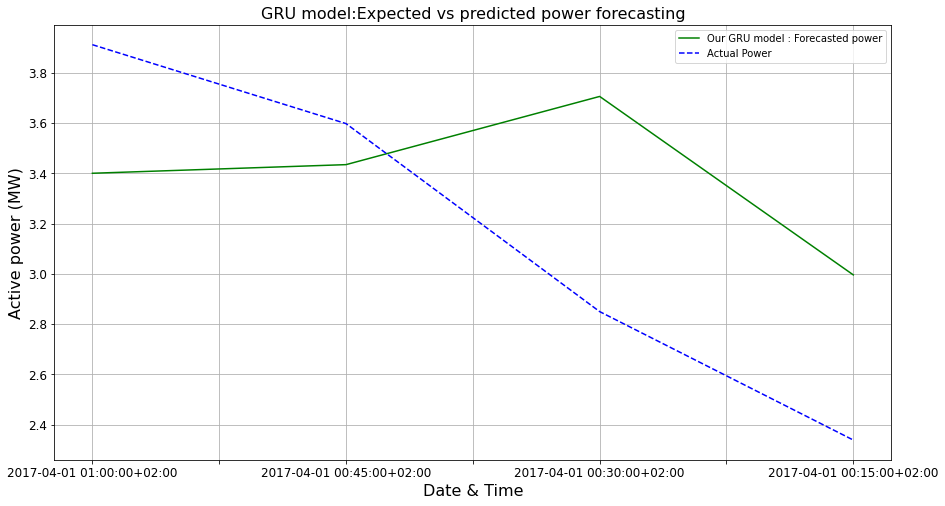

In [60]:
eval_df.plot(x='Date & Time', y=['prediction','actual'], style=['g','--b'],fontsize=12, figsize=(15, 8))
plt.title("GRU model:Expected vs predicted power forecasting",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.legend(['Our GRU model : Forecasted power', 'Actual Power'])
plt.savefig("GRU-results.pdf")
plt.savefig("GRU-results.png")
plt.show()